In [2]:
import os 
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x) 




In [3]:
os.chdir('/Users/meera/Documents/AP-Exams/Data')
ap = pd.read_csv('ap_model.csv')
ap

,year,ncessch,enrollment,AP_oneormore_relative,teachers_per_student,security_gaurds_per_students,avg_teacher_salary,%Asian,%Black,%Hispanic,%Indigenous \nAmerican,%Multiracial,%Pacific \nIslander,%White,%Female,%Male,enrl_AP,enrl_AP_science,enrl_AP_math,enrl_AP_other,enrl_gifted_talented,students_SAT_ACT,students_chronically_absent,students_report_harass_dis,students_susp_in_sch,students_susp_out_sch_single,students_susp_out_sch_multiple,students_arrested
0,2011,60000103278.0000,83.0000,-0.2329,0.0002,0.0000,17499.4056,0.0039,-0.0045,-0.0388,-0.0029,-0.0694,0.0004,0.1114,-0.0093,0.0093,0.0855,0.0317,-0.0140,-0.0548,0.0587,-0.0187,-0.0059,0.0000,-0.0108,0.0157,0.0311,0.0000
1,2011,60000310347.0000,22.2500,-0.2826,-0.0017,-0.0026,3164.3876,-0.0238,0.0080,-0.0452,0.0032,-0.0157,0.0031,0.0705,-0.0005,0.0005,0.0030,-0.0052,0.0095,0.0001,-0.0094,-0.0365,0.0140,0.0006,0.0043,0.0178,0.0234,0.0000
2,2011,60001302405.0000,-92.2500,3.6447,0.0004,-0.0003,-15597.9657,-0.0300,-0.0034,0.0053,0.0009,0.0037,0.0171,0.0063,0.0130,-0.0130,-0.0178,-0.0274,0.0175,0.0038,0.0027,0.0086,-0.0016,0.0000,0.0695,-0.0081,0.0381,0.0000
3,2011,60001311010.0000,-88.2500,1.7782,0.0011,-0.0003,-8989.7469,-0.0413,0.0013,-0.0035,0.0010,-0.0126,0.0266,0.0285,0.0102,-0.0102,-0.0043,-0.0070,-0.0213,-0.0355,-0.0092,0.0114,-0.0059,0.0000,0.0014,0.0137,0.0020,0.0008
4,2011,60001609086.0000,128.0000,-2.5556,0.0001,0.0003,1794.2415,-0.0155,-0.0074,-0.0499,0.0000,0.0033,0.0135,0.0561,-0.0004,0.0004,0.0027,-0.0110,0.0096,-0.0161,-0.0122,-0.0257,-0.0262,0.0000,-0.0046,0.0077,0.0019,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4456,2017,69113511047.0000,-162.0000,0.9247,-0.0059,-0.0008,17302.0010,-0.0020,-0.0268,0.1479,0.0000,-0.1070,-0.0034,-0.0087,-0.0024,0.0024,0.0293,-0.1378,-0.1205,0.0594,-0.0192,0.1071,-0.0452,0.0000,-0.0878,0.0117,-0.0353,-0.0011
4457,2017,69113512749.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4458,2017,69113513992.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4459,2017,69113603761.0000,-1.3333,-1.0904,0.0002,0.0000,-10080.8001,0.0001,0.0000,0.0333,-0.0018,-0.0139,0.0000,-0.0140,-0.0330,0.0330,0.0216,0.0028,-0.0045,0.0058,0.0060,0.0058,-0.0044,-0.0018,0.0000,-0.0232,0.0205,0.0000


In [4]:
from sklearn.model_selection import train_test_split

In [8]:
X = np.array(ap.drop(['ncessch', 'AP_oneormore_relative'], axis=1)).reshape(4461, 26)
y = np.array(ap.AP_oneormore_relative)

x_train, x_test, y_train, y_test = train_test_split(X, y)

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [14]:
y_pred = regressor.predict(x_test)

In [15]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,6.3717,2.5949
1,-5.4804,-2.0539
2,-0.8194,4.7000
3,-1.8871,-0.2898
4,-6.9505,-3.9262
...,...,...
1111,5.3949,6.3031
1112,-0.5458,1.4610
1113,5.3239,2.7054
1114,-5.8170,-4.0187


In [19]:
import statsmodels.api as sm

mod = sm.OLS(y_train, x_train)
res = mod.fit()
residuals = res.resid
predicted = res.fittedvalues
observed = y
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.332
Model:                            OLS   Adj. R-squared (uncentered):              0.327
Method:                 Least Squares   F-statistic:                              63.49
Date:                Mon, 25 Apr 2022   Prob (F-statistic):                   1.92e-267
Time:                        14:28:37   Log-Likelihood:                         -9437.7
No. Observations:                3345   AIC:                                  1.893e+04
Df Residuals:                    3319   BIC:                                  1.909e+04
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [16]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.705364948286245
Mean Squared Error: 16.854356933793333
Root Mean Squared Error: 4.105405818404964


In [11]:
from sklearn.ensemble import ExtraTreesClassifier

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

## Trying to do Random Forest !!

In [68]:
X = np.array(ap.drop(['ncessch', 'AP_oneormore_relative'], axis=1)).reshape(4461, 26)
y = np.array(ap.AP_oneormore_relative)

x_train, x_test, y_train, y_test = train_test_split(X, y)

 ### Creating a baseline for a model to see if it imporves from here ..

In [69]:
x_test

array([[ 2.01300000e+03, -1.48250000e+02,  1.61874708e-03, ...,
        -1.04218742e-02, -1.47763962e-03,  8.98597617e-03],
       [ 2.01100000e+03, -7.50000000e+00,  7.07376387e-04, ...,
        -1.96250599e-02, -3.76504864e-02, -4.58052073e-03],
       [ 2.01100000e+03,  3.97500000e+01, -4.25309019e-04, ...,
         1.21104891e-02,  1.45439315e-02,  7.24854250e-04],
       ...,
       [ 2.01700000e+03, -2.70000000e+01,  6.59701678e-04, ...,
         5.90538003e-03,  1.55169708e-03,  3.98027189e-04],
       [ 2.01100000e+03,  4.50000000e+00,  9.19793693e-04, ...,
         6.30441816e-03,  2.75888358e-03, -1.54225787e-04],
       [ 2.01300000e+03, -7.70000000e+01, -4.35296868e-04, ...,
         3.88200662e-03,  3.50044469e-03, -3.11915159e-04]])

In [70]:
# X = np.array(ap.drop(['ncessch', 'AP_oneormore_relative'], axis=1))
# y = np.array(ap.AP_oneormore_relative)

# x_train, x_test, y_train, y_test = train_test_split(X, y)


# baseline_pred = x_test[:, x_test.index('average')]

Now we fit the model ... meep

In [71]:
#fit and score the data using RF
RF = RandomForestRegressor(n_estimators=100)
RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)

errors = abs(y_pred - y_test)
errors

array([0.54960846, 2.30152257, 1.22990392, ..., 0.98125466, 1.12781098,
       0.20908375])

In [72]:
RF.feature_importances_

array([0.00589286, 0.01968407, 0.02289459, 0.02162243, 0.03674385,
       0.03504473, 0.01979835, 0.02247804, 0.01765558, 0.02218384,
       0.0229899 , 0.01869172, 0.01126645, 0.01092094, 0.3954502 ,
       0.03474945, 0.02557165, 0.05234195, 0.03197811, 0.04941806,
       0.02939599, 0.01101765, 0.01696873, 0.02628039, 0.02031783,
       0.01864265])

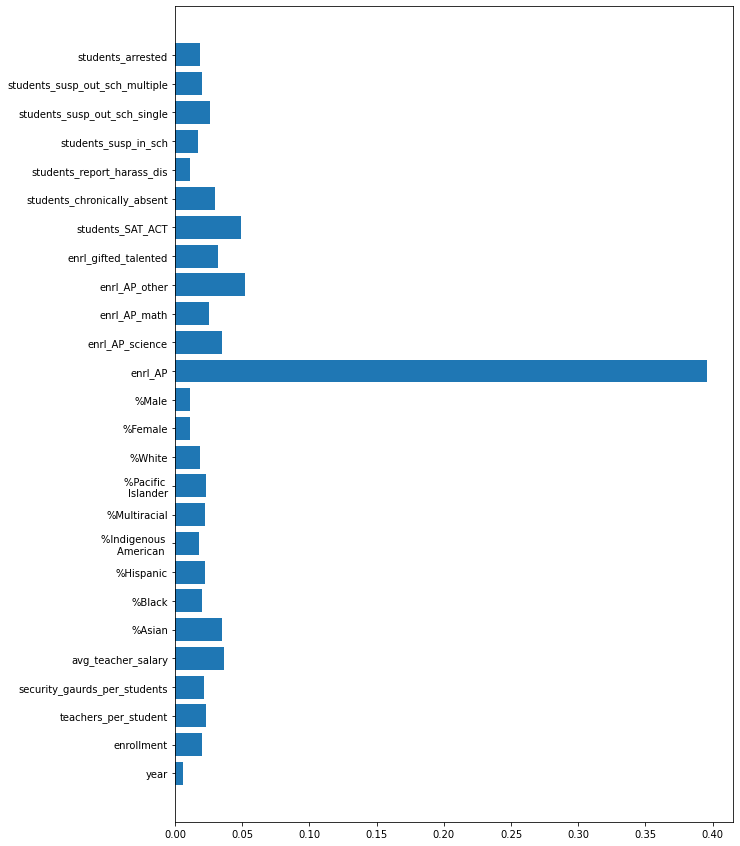

In [73]:
data = ap.drop(['ncessch', 'AP_oneormore_relative'], axis = 1)
plt.figure(figsize=(10,15))
plt.barh(data.columns, RF.feature_importances_)
plt.show()

In [74]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.500844548387665
Mean Squared Error: 14.489717198794988
Root Mean Squared Error: 3.8065361155248465


/Users/meera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/meera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


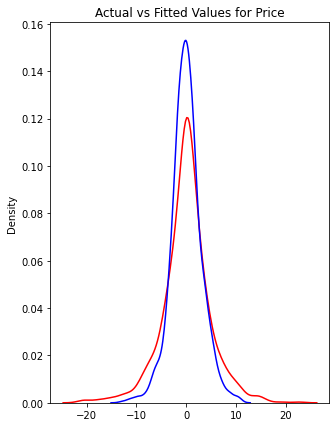

In [75]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

In [76]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.3797149851000369

R² score tells us how well our model is fitted to the data by comparing it to the average line of the dependent variable.

### Redoing the Random Forest but with out the AP enrollement scores ! 

In [58]:
X = np.array(ap.drop(['ncessch', 'AP_oneormore_relative',
                      'enrl_AP_other', 'enrl_AP_math',
                      'enrl_AP', 'enrl_AP_science'
                     ], axis=1)).reshape(4461, 22)
y = np.array(ap.AP_oneormore_relative)

x_train, x_test, y_train, y_test = train_test_split(X, y)

In [59]:
#fit and score the data using RF
RF = RandomForestRegressor(n_estimators=100)
RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)

errors = abs(y_pred - y_test)
errors

array([4.66589775, 0.90572738, 0.25916644, ..., 2.6389319 , 4.84643565,
       3.74067651])

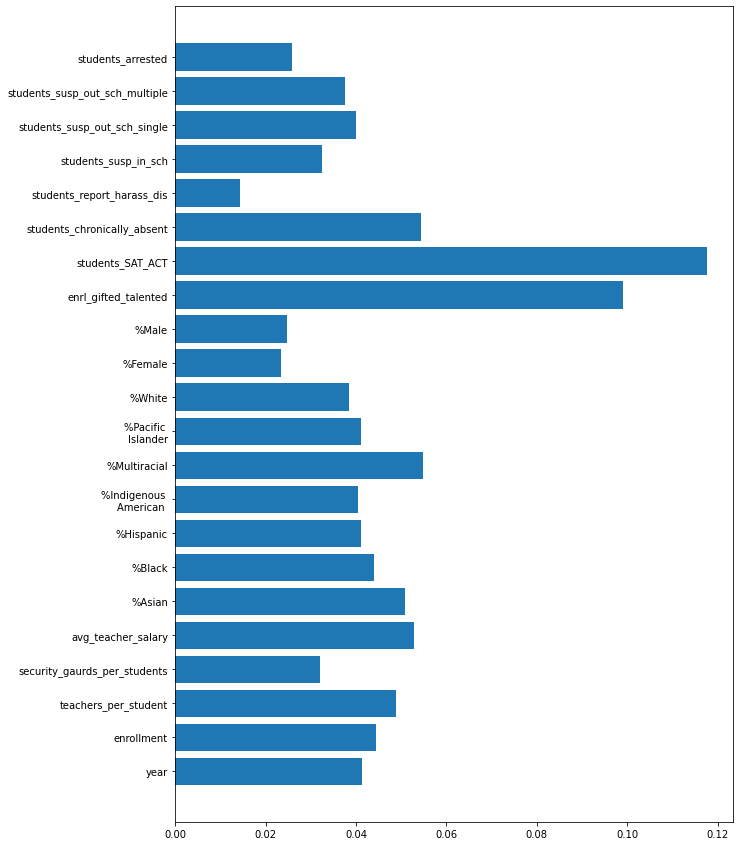

In [61]:
data = ap.drop(['ncessch', 'AP_oneormore_relative',
                      'enrl_AP_other', 'enrl_AP_math',
                      'enrl_AP', 'enrl_AP_science'], axis = 1)
plt.figure(figsize=(10,15))
plt.barh(data.columns, RF.feature_importances_)
plt.show()

In [62]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.2293032023140444
Mean Squared Error: 23.27288784238101
Root Mean Squared Error: 4.824198155380955


/Users/meera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/meera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


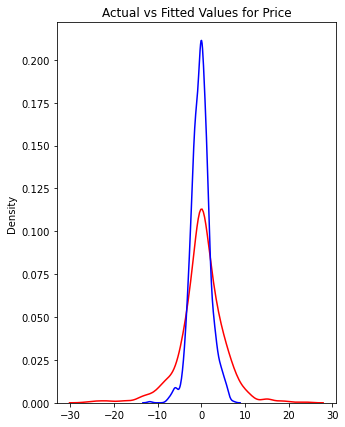

In [63]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

In [67]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.1365455564810334